In [15]:
import time

import mysql.connector
from Params import hostSQL, userSQL, passwdSQL, databaseSQL
import os
import json
import pandas as pd

import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

import nltk
from nltk.corpus import stopwords



In [2]:

mydb = mysql.connector.connect(
    host=hostSQL,
    user=userSQL,
    passwd=passwdSQL,
    auth_plugin='mysql_native_password',
    database=databaseSQL
)

mycursor = mydb.cursor()


In [3]:
sql = 'SELECT * FROM chatroom'
mycursor.execute(sql)
chatlog = mycursor.fetchall()

sql = 'DESCRIBE chatroom'
mycursor.execute(sql)
chatDescribe = mycursor.fetchall()

columns = []
for i in chatDescribe:
    columns.append(i[0])

df = pd.DataFrame(chatlog, columns=columns)

df['chat_line'] = df.chat_line.str[:-1]

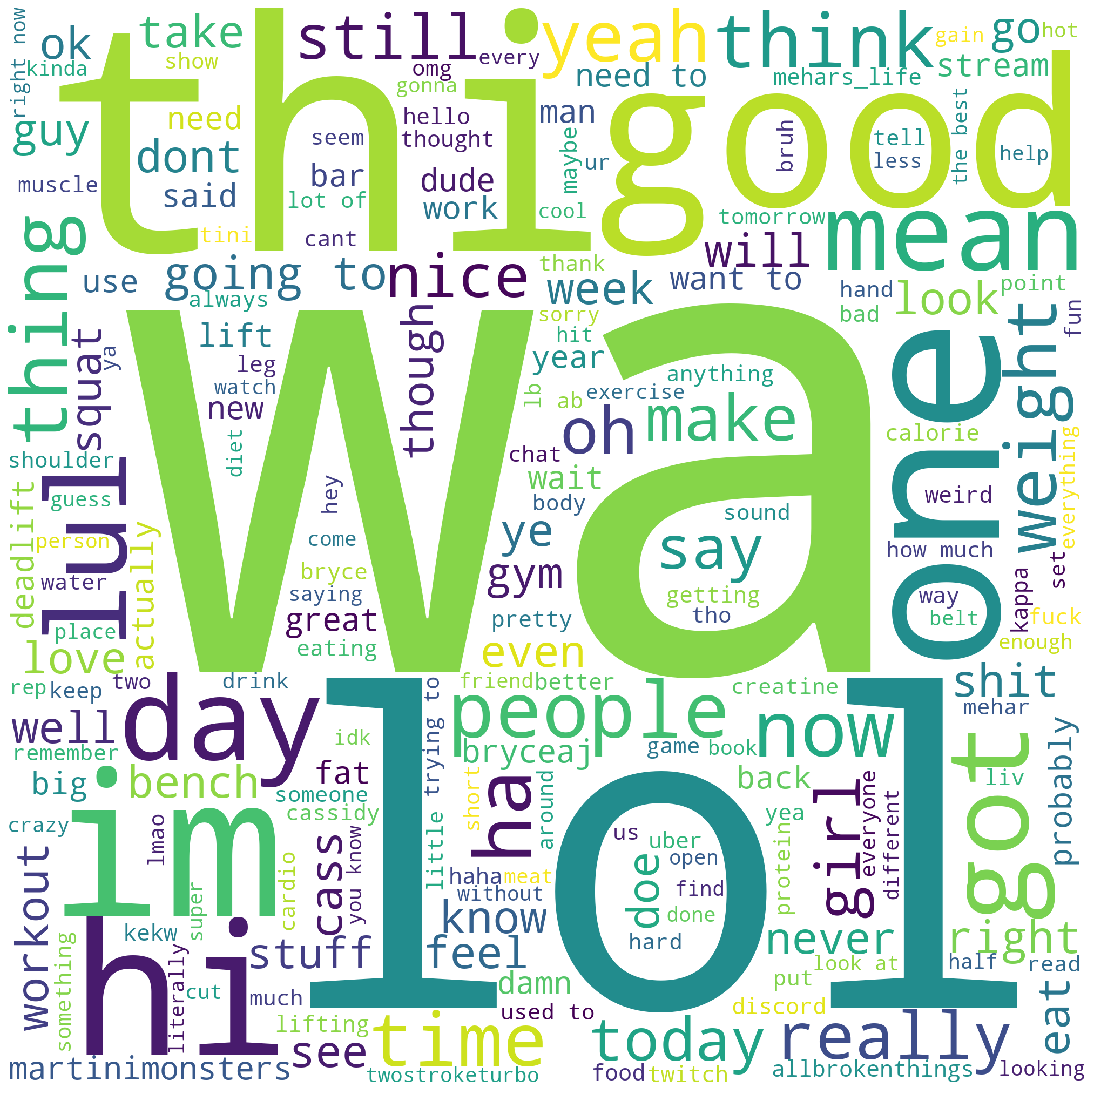

In [4]:
martonoChat = df[df['chatchannel'] == 'martinimonsters']

from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in martonoChat.chat_line: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

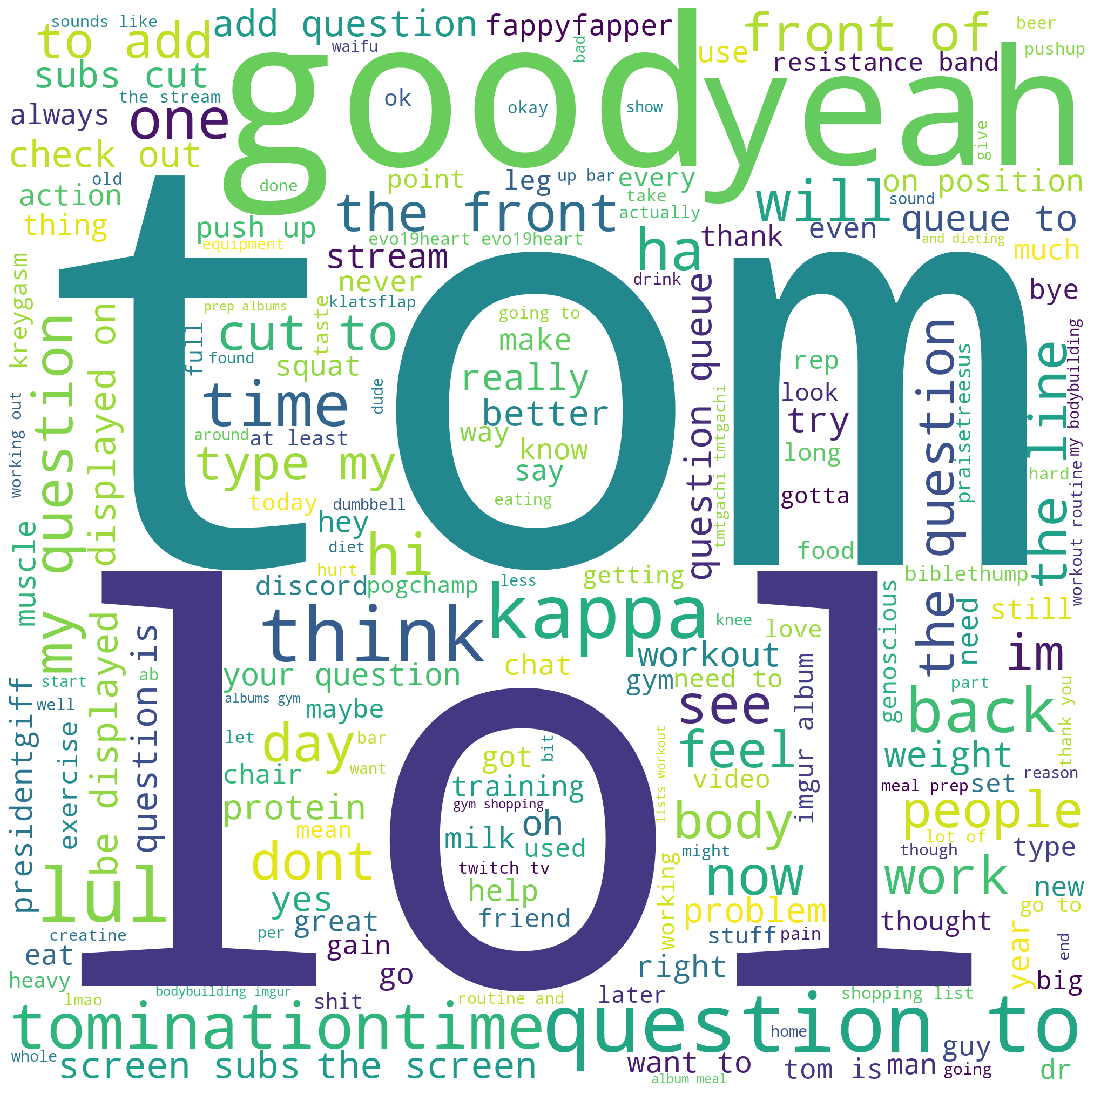

In [5]:
martonoChat = df[df['chatchannel'] == 'tominationtime']

from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in martonoChat.chat_line: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [6]:
df

,from_ID,display_name,chat_line,sent_at,chatchannel
0,NaN,bandslam33,"yea, it's ok @twostroketurbo",2020-04-28 21:39:30,martinimonsters
1,NaN,skryspace,Hi,2020-04-28 21:39:43,martinimonsters
2,NaN,ronniey90,basically lift until you snap something,2020-04-28 21:39:49,martinimonsters
3,NaN,mileskyc,No just she's working on her masters stuff for...,2020-04-28 21:39:52,martinimonsters
4,NaN,ronniey90,^expert advice,2020-04-28 21:39:53,martinimonsters
...,...,...,...,...,...
88778,466354579.0,aguyontwitch99,999,2020-05-15 14:43:39,miss_angeliquew
88779,67598443.0,gamerjuniour,Btw I put 300 hours into Animal crossing and I...,2020-05-15 14:43:39,miss_angeliquew
88780,53004716.0,rich9042,No way you dont know what god of war is,2020-05-15 14:43:40,miss_angeliquew
88781,518384033.0,basketballtill24,idk what a hex is,2020-05-15 14:43:42,hapabott


In [21]:
np.random.seed(200)

document = df[df['chatchannel'] == 'martinimonsters']['chat_line'].to_list()

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(document)

k = 30
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 want
 cass
 going
 bad
 love
 ll
 bryceaj
 thats
 uber
 bar
Cluster 1:
 like
 just
 feel
 looks
 dont
 years
 thats
 guy
 think
 stuff
Cluster 2:
 know
 mean
 yea
 dont
 bryce
 mehars_life
 whats
 tini
 strong
 right
Cluster 3:
 time
 man
 just
 pac
 dip
 long
 eat
 thanks
 ive
 need
Cluster 4:
 fat
 abs
 body
 just
 people
 low
 thicc
 lose
 like
 look
Cluster 5:
 oh
 yea
 wait
 thank
 god
 lul
 meant
 okay
 lol
 president
Cluster 6:
 workout
 lifting
 home
 long
 good
 favorite
 outfit
 today
 martinimonsters
 want
Cluster 7:
 im
 drunk
 going
 like
 gonna
 lol
 jealous
 just
 feel
 scared
Cluster 8:
 yeah
 oh
 just
 lol
 like
 guess
 probably
 second
 weights
 dont
Cluster 9:
 lol
 np
 friends
 whoa
 nope
 texas
 hdmexiqtioner
 sent
 type
 allbrokenthings
Cluster 10:
 got
 big
 ass
 legs
 just
 gym
 lol
 twitch
 ve
 thats
Cluster 11:
 just
 good
 saying
 night
 really
 think
 say
 lol
 make
 mean
Cluster 12:
 lift
 helps
 heavier
 safe
 http
 yes
 weight
 just
 like
 rea

In [24]:
cassChat = df[df['chatchannel'] == 'martinimonsters'].reset_index()

labels = pd.DataFrame(model.labels_, columns=['label'])

cassChatwLabels = pd.concat([cassChat.iloc[:,1:], labels], axis=1)

cassChatwLabels.groupby(['label']).count()

,from_ID,display_name,chat_line,sent_at,chatchannel
label,,,,,
0,598,637,637,637,637
1,465,483,483,483,483
2,402,414,414,414,414
3,174,181,181,181,181
4,75,80,80,80,80
5,91,98,98,98,98
6,83,89,89,89,89
7,187,203,203,203,203
8,110,118,118,118,118


In [46]:
cassChatwLabels[cassChatwLabels['label'] == 20]

,from_ID,display_name,chat_line,sent_at,chatchannel,label
926,60538926.0,sudobiologist,"how many people live there @mehars_life? you, ...",2020-04-29 21:57:50,martinimonsters,20
975,60538926.0,sudobiologist,everything will be cheap for a while when peop...,2020-04-29 22:06:02,martinimonsters,20
1200,47355552.0,cdnhawk46,Scuffy has a higher IQ than some people in thi...,2020-04-29 22:40:22,martinimonsters,20
1344,80698189.0,bryceaj,All of my friends claim theyre the funniest pe...,2020-04-29 22:59:57,martinimonsters,20
1419,80698189.0,bryceaj,Do people really think like this?,2020-04-29 23:08:38,martinimonsters,20
...,...,...,...,...,...,...
11947,29240571.0,kyleeverett,They are letting people eat inside restaurants...,2020-05-14 23:59:05,martinimonsters,20
11960,2391806.0,curs3dfox,They already did send all the stupid people to...,2020-05-15 00:01:03,martinimonsters,20
11965,72794566.0,hham85,"yeah its a county thing, I drove past the cros...",2020-05-15 00:01:11,martinimonsters,20
11974,29240571.0,kyleeverett,5-10 people at a time might not be worth it to...,2020-05-15 00:02:56,martinimonsters,20


In [12]:
cassChatwLabels[cassChatwLabels['label'] == 0].chat_line.tolist()

['@free_aol_cd if it smells like salmon keep on slammin if it smells like trout get the fuck out']